# <font color = lightcoral>Setting Random Seed
>    
### <font color = red> Non-Overlapping Windows

> Running Combinations for Non-Overlapping Transformer Models
>

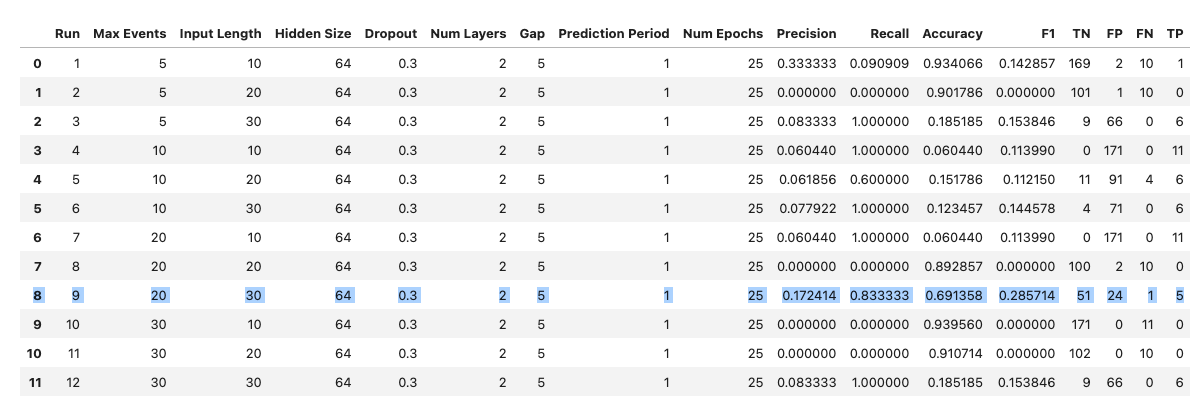

## <font color = grey> Admin

In [1]:
import pandas as pd
import os
import gzip
import time
import warnings
import os
import shutil
from datetime import datetime
import time
# Set display option to show the full length of the column
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

# Determine the base directory based on the effective user ID
if os.geteuid() == 0:  # root user
    base_dir = '/root'
else:
    base_dir = '/home/sagemaker-user'

# Set the environment variable
os.environ['BASE_DIR'] = base_dir

# Verify the base directory
print(f"Base directory set to: {base_dir}")

import warnings
warnings.simplefilter("ignore")


Base directory set to: /home/sagemaker-user


--

## <font color = lightsteelblue>EDA of Parsed File

---

In [2]:
import pandas as pd
import time

# Define the path to the CSV file
# file_path = "/root/08.GIT_Repos_REF/23.Library_Transformers_Logbert_HelenG_BGL/output/bgl/BGL.log_structured.csv"

# file_path = os.path.join(base_dir, '/mnt/efs-w210-capstone/200015/08.GIT_Repos_Anomaly_Detection/23.Library_Transformers_Logbert_HelenG_BGL/output/bgl/BGL.log_structured.csv')
# file_path = os.path.join(base_dir, '/home/ubuntu/efs-w210-capstone-ebs/08.GIT_Repos_Anomaly_Detection/23.Library_Transformers_Logbert_HelenG_BGL/output/bgl/20240701_BGL_Log_Structuted_v1.00.csv')
file_path = os.path.join(base_dir,'/home/ubuntu/efs-w210-capstone-ebs/11.Data/01.BGL/09.20240704_parsed_bgl/BGL.log_structured.csv')
# file_path = os.path.join(base_dir,'/home/ubuntu/efs-w210-capstone-ebs/11.Data/01.BGL/09.20240704_parsed_bgl/BGL_Sample.log_structured.csv')

# Start timing
start_time = time.time()

# Read the CSV file
df = pd.read_csv(file_path)

# Section 1: Preview
print("\n" + "*"*100)
print("********************** Section 1: Preview ******************************************")
print("*"*100 + "\n")
display(df.head())

# Section 2: Shape of the DataFrame
print("\n" + "*"*100)
print("********************** Section 2: Shape of the DataFrame ****************************")
print("*"*100 + "\n")
print(df.shape)

# Section 3: DataFrame Information
print("\n" + "*"*100)
print("********************** Section 3: DataFrame Information ****************************")
print("*"*100 + "\n")
print(df.info())

# Section 4: Summary Statistics (without scientific notation)
print("\n" + "*"*100)
print("********************** Section 4: Summary Statistics *******************************")
print("*"*100 + "\n")
pd.options.display.float_format = '{:,.0f}'.format
print(df.describe())

# Section 5: Unique Event Templates
print("\n" + "*"*100)
print("********************** Section 5: Unique Event Templates ***************************")
print("*"*100 + "\n")
print(df['EventTemplate'].nunique())

# Section 6: Count of Each Event Template
print("\n" + "*"*100)
print("********************** Section 6: Count of Each Event Template *********************")
print("*"*100 + "\n")
print(df['EventTemplate'].value_counts().head())

# Section 7: Most Frequent Event Templates with Counts (ordered by occurrences)
print("\n" + "*"*100)
print("********************** Section 7: Most Frequent Event Templates *********************")
print("*"*100 + "\n")
df_sorted = df.groupby(['EventId', 'EventTemplate']).size().reset_index(name='Occurrences')
df_sorted = df_sorted.sort_values(by='Occurrences', ascending=False).reset_index(drop=True)
df_sorted.index += 1  # Make the index start from 1
print(df_sorted.head())

# Section 8: Alert Analysis
print("\n" + "*"*100)
print("********************** Section 8: Alert Analysis ************************************")
print("*"*100 + "\n")

# Count of normal vs alert logs
label_counts = df['Label'].value_counts()
print(f"Normal logs: {label_counts.get('-', 0)}")
print(f"Alert logs: {label_counts.sum() - label_counts.get('-', 0)}")

# Most frequent labels for alerts
alert_labels = df[df['Label'] != '-']['Label'].value_counts().head()
print("\nMost frequent alert labels:")
print(alert_labels)

# Distribution of alert levels
alert_levels = df[df['Label'] != '-']['Level'].value_counts()
print("\nDistribution of alert levels:")
print(alert_levels)

# Section 9: Label and Alert Level Analysis
print("\n" + "*"*100)
print("********************** Section 9: Label and Alert Level Analysis ********************")
print("*"*100 + "\n")

# Distribution of values in the Label column with an indicator for normal or alert
df['LogType'] = df['Label'].apply(lambda x: 'Normal' if x == '-' else 'Alert')
label_distribution = df.groupby(['LogType', 'Label']).size()
print("\nDistribution of values in the Label column with an indicator for normal or alert:")
display(label_distribution)

# Distribution of values in the Level column for alerts
alert_level_distribution = df[df['LogType'] == 'Alert'].groupby('Level').size().reset_index(name='count')
alert_level_distribution['LogType'] = 'Alert'
print("\nDistribution of values in the Level column for alerts:")
display(alert_level_distribution[['LogType', 'Level', 'count']])

# Distribution of values in the Level column for normal logs with an indicator for normal or alert
normal_level_distribution = df[df['LogType'] == 'Normal'].groupby('Level').size().reset_index(name='count')
normal_level_distribution['LogType'] = 'Normal'
print("\nDistribution of values in the Level column for normal logs with an indicator for normal or alert:")
display(normal_level_distribution[['LogType', 'Level', 'count']])

# Section 10: Combined LogType, Label, Level, and Count
print("\n" + "*"*100)
print("********************** Section 10: Combined LogType, Label, Level, and Count ********")
print("*"*100 + "\n")

combined_distribution = df.groupby(['LogType', 'Label', 'Level']).size().reset_index(name='count')
combined_distribution = combined_distribution.sort_values(by=['LogType', 'count', 'Label'], ascending=[False, False, True])
display(combined_distribution)

# Section 11: Count Unique Values in Each Column
print("\n" + "*"*100)
print("********************** Section 11: Count Unique Values in Each Column ****************")
print("*"*100 + "\n")
print(df.nunique())

# Section 12: Random Sample of 10 Alert Rows
print("\n" + "*"*100)
print("********************** Section 12: Random Sample of 10 Alert Rows ********************")
print("*"*100 + "\n")
alert_rows = df[df['Label'] != '-']
sample_alert_rows = alert_rows.sample(n=10) if len(alert_rows) >= 10 else alert_rows
display(sample_alert_rows)

# Section 13: Analysis of Rows for Normal and Alert Labels
print("\n" + "*"*100)
print("********************** Section 13: Analysis of Rows for Normal and Alert Labels ********")
print("*"*100 + "\n")

# Grouping by LogType to count rows for Normal and Alert logs
logtype_counts = df['LogType'].value_counts()
total_logs = logtype_counts.sum()
normal_percentage = (logtype_counts['Normal'] / total_logs) * 100
alert_percentage = (logtype_counts['Alert'] / total_logs) * 100

print(f"Normal logs: {logtype_counts['Normal']} ({normal_percentage:.2f}%)")
print(f"Alert logs: {logtype_counts['Alert']} ({alert_percentage:.2f}%)")

# End timing
end_time = time.time()
duration = end_time - start_time
print("\n" + "_"*100)
print(f"\nTime taken: {duration:.2f} seconds")
print("\n" + "_"*100)


****************************************************************************************************
********************** Section 1: Preview ******************************************
****************************************************************************************************



,LineId,Label,Id,Date,Code1,Time,Code2,Component1,Component2,Level,Content,EventId,EventTemplate
0,1,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.363779,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected
1,2,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.527847,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected
2,3,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.675872,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected
3,4,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.823719,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected
4,5,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.982731,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected



****************************************************************************************************
********************** Section 2: Shape of the DataFrame ****************************
****************************************************************************************************

(4713493, 13)

****************************************************************************************************
********************** Section 3: DataFrame Information ****************************
****************************************************************************************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4713493 entries, 0 to 4713492
Data columns (total 13 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   LineId         int64 
 1   Label          object
 2   Id             int64 
 3   Date           object
 4   Code1          object
 5   Time           object
 6   Code2          object
 7   Component1     object
 8   Component2     obje

LogType  Label    
Alert    APPALLOC         144
         APPBUSY          512
         APPCHILD         320
         APPOUT           816
         APPREAD         5983
         APPRES          2370
         APPSEV         49651
         APPTO           1991
         APPTORUS          10
         APPUNAV         2048
         KERNBIT            1
         KERNCON           16
         KERNDTLB      152734
         KERNEXT            1
         KERNFLOAT          3
         KERNMC           342
         KERNMICRO       1503
         KERNMNT          720
         KERNMNTF       31531
         KERNNOETH         14
         KERNPAN           18
         KERNPOW          192
         KERNPROG           5
         KERNREC         6145
         KERNRTSA           3
         KERNRTSP        3983
         KERNSERV          94
         KERNSOCK         209
         KERNSTOR       63491
         KERNTERM       23338
         KERNTLBE           1
         LINKBLL            2
         LINKDISC    


Distribution of values in the Level column for alerts:


,LogType,Level,count
0,Alert,FAILURE,62
1,Alert,FATAL,348398



Distribution of values in the Level column for normal logs with an indicator for normal or alert:


,LogType,Level,count
0,Normal,"0x00544eb8,",2
1,Normal,ERROR,112355
2,Normal,FAILURE,1652
3,Normal,FATAL,506260
4,Normal,INFO,3701880
5,Normal,Kill,306
6,Normal,SEVERE,19213
7,Normal,WARNING,23357
8,Normal,microseconds,4
9,Normal,single,4



****************************************************************************************************
********************** Section 10: Combined LogType, Label, Level, and Count ********
****************************************************************************************************



,LogType,Label,Level,count
45,Normal,-,INFO,3701880
44,Normal,-,FATAL,506260
42,Normal,-,ERROR,112355
48,Normal,-,WARNING,23357
47,Normal,-,SEVERE,19213
43,Normal,-,FAILURE,1652
46,Normal,-,Kill,306
49,Normal,-,microseconds,4
50,Normal,-,single,4
41,Normal,-,"0x00544eb8,",2



****************************************************************************************************
********************** Section 11: Count Unique Values in Each Column ****************
****************************************************************************************************

LineId           4713493
Label                 42
Id                299383
Date                 215
Code1              69251
Time             4713485
Code2              69257
Component1             6
Component2            14
Level                 10
Content           358356
EventId             1000
EventTemplate       1000
LogType                2
dtype: int64

****************************************************************************************************
********************** Section 12: Random Sample of 10 Alert Rows ********************
****************************************************************************************************



,LineId,Label,Id,Date,Code1,Time,Code2,Component1,Component2,Level,Content,EventId,EventTemplate,LogType
366883,366884,KERNDTLB,1118557120,2005.06.11,R30-M0-N9-C:J16-U01,2005-06-11-23.18.40.817862,R30-M0-N9-C:J16-U01,RAS,KERNEL,FATAL,data TLB error interrupt,fd2fdc47,<*> TLB error interrupt,Alert
293924,293925,KERNDTLB,1118546104,2005.06.11,R30-M0-N9-C:J16-U01,2005-06-11-20.15.04.842413,R30-M0-N9-C:J16-U01,RAS,KERNEL,FATAL,data TLB error interrupt,fd2fdc47,<*> TLB error interrupt,Alert
464553,464554,KERNSTOR,1118766797,2005.06.14,R21-M1-N4-C:J04-U01,2005-06-14-09.33.17.127616,R21-M1-N4-C:J04-U01,RAS,KERNEL,FATAL,data storage interrupt,121941c0,data <*> <*>,Alert
327131,327132,KERNDTLB,1118551092,2005.06.11,R30-M0-N9-C:J16-U01,2005-06-11-21.38.12.855534,R30-M0-N9-C:J16-U01,RAS,KERNEL,FATAL,data TLB error interrupt,fd2fdc47,<*> TLB error interrupt,Alert
358799,358800,KERNDTLB,1118555919,2005.06.11,R30-M0-N9-C:J16-U01,2005-06-11-22.58.39.777428,R30-M0-N9-C:J16-U01,RAS,KERNEL,FATAL,data TLB error interrupt,fd2fdc47,<*> TLB error interrupt,Alert
3375202,3375203,KERNMNTF,1126815148,2005.09.15,R47-M0-N8-I:J18-U01,2005-09-15-13.12.28.358581,R47-M0-N8-I:J18-U01,RAS,KERNEL,FATAL,Lustre mount FAILED : bglio634 : point /p/gb1,64dc455d,Lustre mount FAILED : bglio<*> : point /p/gb<*>,Alert
313927,313928,KERNDTLB,1118549113,2005.06.11,R30-M0-N9-C:J16-U01,2005-06-11-21.05.13.432291,R30-M0-N9-C:J16-U01,RAS,KERNEL,FATAL,data TLB error interrupt,fd2fdc47,<*> TLB error interrupt,Alert
3472584,3472585,KERNTERM,1127264503,2005.09.20,R05-M0-NC-C:J13-U11,2005-09-20-18.01.43.608127,R05-M0-NC-C:J13-U11,RAS,KERNEL,FATAL,rts: kernel terminated for reason 1004,130bb340,rts: kernel terminated for reason <*>,Alert
391821,391822,KERNSTOR,1118709652,2005.06.13,R02-M1-NF-C:J04-U01,2005-06-13-17.40.52.166309,R02-M1-NF-C:J04-U01,RAS,KERNEL,FATAL,data storage interrupt,121941c0,data <*> <*>,Alert
3044406,3044407,KERNTERM,1123993663,2005.08.13,R77-M0-N4-C:J16-U01,2005-08-13-21.27.43.287382,R77-M0-N4-C:J16-U01,RAS,KERNEL,FATAL,rts: kernel terminated for reason 1001,130bb340,rts: kernel terminated for reason <*>,Alert



****************************************************************************************************
********************** Section 13: Analysis of Rows for Normal and Alert Labels ********
****************************************************************************************************

Normal logs: 4365033 (92.61%)
Alert logs: 348460 (7.39%)

____________________________________________________________________________________________________

Time taken: 25.28 seconds

____________________________________________________________________________________________________


---

___
# <font color = darkkhaki> (D). Data Prep --> Create sample for sanity testing

In [3]:
# import pandas as pd

# # Load the data
# data_dir = '/home/ubuntu/efs-w210-capstone-ebs/11.Data/01.BGL/09.20240704_parsed_bgl'
# input_file = f"{data_dir}/20240704__full__new_features_v1.10.parquet"
# df = pd.read_parquet(input_file)

# # Split the data
# train_size = int(0.8 * len(df))
# train_df = df[:train_size]
# test_df = df[train_size:]

# # Save the splits
# train_output_file = f"{data_dir}/20240704__train__new_features_v1.10.parquet"
# test_output_file = f"{data_dir}/20240704__test__new_features_v1.10.parquet"

# train_df.to_parquet(train_output_file)
# test_df.to_parquet(test_output_file)

In [4]:
# import pandas as pd

# ####################### Full Base ######################################
# # data_dir = '/home/ubuntu/efs-w210-capstone-ebs/11.Data/01.BGL/10.20240705_StartOver_NewFeatures/01.Full_Base/'
# # input_file = f"{data_dir}/20240704__full__new_features_v1.10.parquet"

# ####################### Sample Base ######################################
# data_dir = '/home/ubuntu/efs-w210-capstone-ebs/11.Data/01.BGL/10.20240705_StartOver_NewFeatures/03.Sample_Base/'
# input_file = f"{data_dir}/20240704__sample__new_features_v1.50.parquet"

# ####################### Full Test_Train ######################################
# # data_dir = '/home/ubuntu/efs-w210-capstone-ebs/11.Data/01.BGL/10.20240705_StartOver_NewFeatures/02.Full_Train_Test/'
# # input_file = f"{data_dir}/20240704__train__new_features_v1.10.parquet"
# # input_file = f"{data_dir}/20240704__test__new_features_v1.10.parquet"

# ####################### Sample Test_Train ######################################
# # data_dir = '/home/ubuntu/efs-w210-capstone-ebs/11.Data/01.BGL/10.20240705_StartOver_NewFeatures/04.Sample_Train_Test/'
# # input_file = f"{data_dir}/20240705_train_claude.parquet"
# # input_file = f"{data_dir}/20240705_test_claude.parquet"
# # input_file = f"{data_dir}/X_train.parquet"

# # Read the parquet file
# df = pd.read_parquet(input_file)

# # Count the number of rows
# row_count = len(df)

# print("*"*100 + "\n")
# print("************************************** # Rows ********************************")

# print(f"The number of rows in the parquet file is: {row_count}")

# # print("*"*100 + "\n")
# print("************************************** Distinct Records by Class ****************")

# # Count the number of distinct records by Class
# distinct_class_counts = df['Class'].value_counts()

# print(f"The count of distinct records by Class is:\n{distinct_class_counts}")

# print("************************************** Shape ***************************")

# print(df.shape)

# print("************************************** Columns *************************")

# print(df.columns)

# # print("*"*100 + "\n")
# print("************************************** Display Sample ********************************")

# # Select the first 8 columns (assuming they exist)
# first_eight_columns = df.iloc[:, :12]  # Use indexing for columns

# # Display the first few rows of the selected columns
# display(first_eight_columns.head(5))

----

# <font color = tomato> Loop

Run 1: max_events=5, input_length=30, hidden_size=64, dropout=0.3, num_layers=2, gap=5, prediction_period=1, num_epochs=25
Epoch [1/25], Loss: 0.6492
Epoch [2/25], Loss: 0.6623
Epoch [3/25], Loss: 0.7150
Epoch [4/25], Loss: 0.6626
Epoch [5/25], Loss: 0.7319
Epoch [6/25], Loss: 0.7260
Epoch [7/25], Loss: 0.6745
Epoch [8/25], Loss: 0.7060
Epoch [9/25], Loss: 0.6997
Epoch [10/25], Loss: 0.6883
Epoch [11/25], Loss: 0.7231
Epoch [12/25], Loss: 0.7148
Epoch [13/25], Loss: 0.7412
Epoch [14/25], Loss: 0.7103
Epoch [15/25], Loss: 0.6763
Epoch [16/25], Loss: 0.7097
Epoch [17/25], Loss: 0.6889
Epoch [18/25], Loss: 0.6944
Epoch [19/25], Loss: 0.8243
Epoch [20/25], Loss: 0.7043
Epoch [21/25], Loss: 0.6912
Epoch [22/25], Loss: 0.6937
Epoch [23/25], Loss: 0.6869
Epoch [24/25], Loss: 0.7895
Epoch [25/25], Loss: 0.7074
Run 1 Results: Max Events=5, Input Length=30, Hidden Size=64, Dropout=0.3, Num Layers=2, Gap=5, Prediction Period=1, Num Epochs=25, Precision=0.083333, Recall=1.000000, Accuracy=0.185185

,Run,Max Events,Input Length,Hidden Size,Dropout,Num Layers,Gap,Prediction Period,Num Epochs,Precision,Recall,Accuracy,F1,TN,FP,FN,TP
0,1,5,30,64,0.300000,2,5,1,25,0.083333,1.000000,0.185185,0.153846,9,66,0,6
1,2,5,40,64,0.300000,2,5,1,25,0.000000,0.000000,0.984375,0.000000,63,0,1,0
2,3,5,50,64,0.300000,2,5,1,25,0.000000,0.000000,0.730769,0.000000,38,6,8,0
3,4,5,100,64,0.300000,2,5,1,25,0.000000,0.000000,0.857143,0.000000,24,2,2,0
4,5,20,30,64,0.300000,2,5,1,25,0.172414,0.833333,0.691358,0.285714,51,24,1,5
5,6,20,40,64,0.300000,2,5,1,25,0.029412,1.000000,0.484375,0.057143,30,33,0,1
6,7,20,50,64,0.300000,2,5,1,25,0.181818,0.250000,0.711538,0.210526,35,9,6,2
7,8,20,100,64,0.300000,2,5,1,25,0.000000,0.000000,0.857143,0.000000,24,2,2,0
8,9,100,30,64,0.300000,2,5,1,25,0.089552,1.000000,0.246914,0.164384,14,61,0,6
9,10,100,40,64,0.300000,2,5,1,25,0.034483,1.000000,0.562500,0.066667,35,28,0,1



____________________________________________________________________________________________________

Time taken for main loop: 502.00 seconds

____________________________________________________________________________________________________


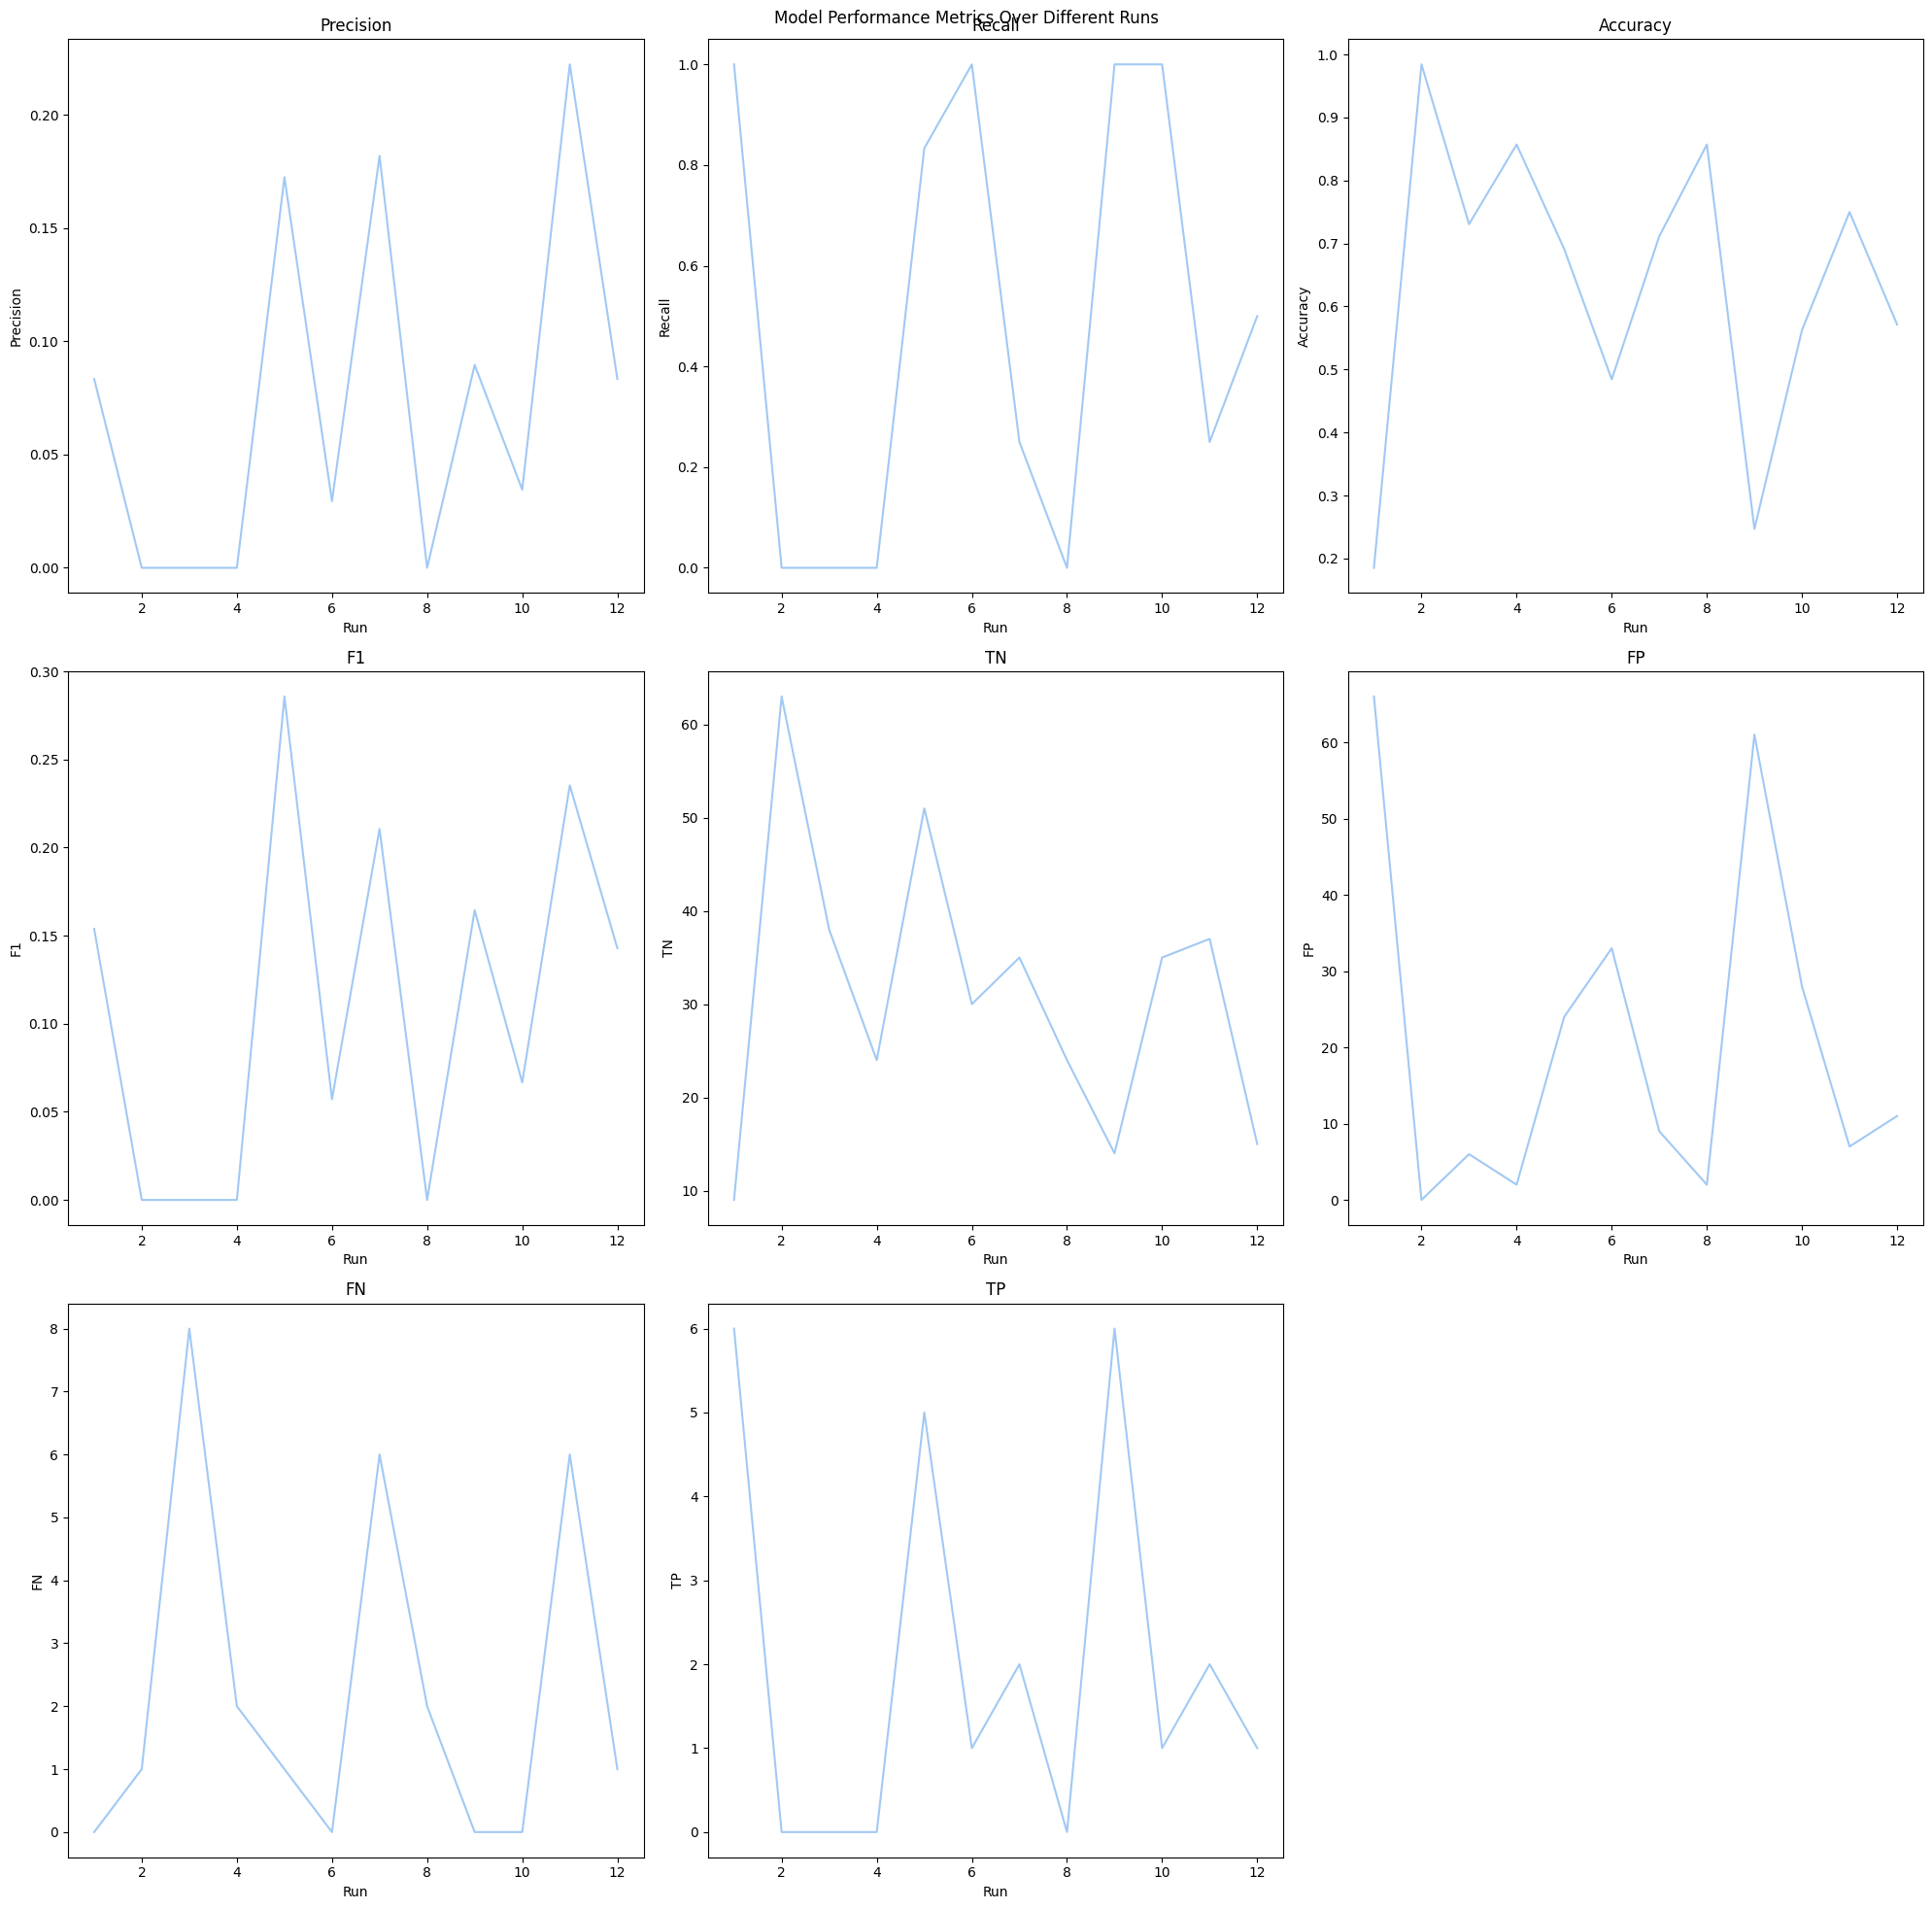

In [5]:
################################### Parameters and Hyperparameters ################################

# Parameters and Hyperparameters
data_dir = '/home/ubuntu/efs-w210-capstone-ebs/11.Data/01.BGL/10.20240705_StartOver_NewFeatures/01.Full_Base/'
input_file = f"{data_dir}/20240704__full__new_features_v1.10.parquet"
output_dir = '/home/ubuntu/efs-w210-capstone-ebs/11.Data/01.BGL/10.20240705_StartOver_NewFeatures/02.Full_Train_Test'

####################### Sample Base ######################################
# data_dir = '/home/ubuntu/efs-w210-capstone-ebs/11.Data/01.BGL/10.20240705_StartOver_NewFeatures/03.Sample_Base/'
# input_file = f"{data_dir}/20240704__sample__new_features_v1.30.parquet"
# output_dir = '/home/ubuntu/efs-w210-capstone-ebs/11.Data/01.BGL/10.20240705_StartOver_NewFeatures/04.Sample_Train_Test'

# Hyperparameter variations to test
# max_events_list = [5, 10, 20, 30, 40, 50, 100]  # Different values to test
# max_events_list = [5, 10, 20, 30]  # Different values to test
max_events_list = [5, 20, 100]  # Different values to test
# input_length_list = [10, 20, 30]  # Different values to test
input_length_list = [30, 40, 50, 100]  # Different values to test

hidden_size_list = [64]  # Different values to test
dropout_list = [0.3]  # Different values to test
num_layers_list = [2]  # Different values to test
gap_list = [5]  # Different values to test
prediction_period_list = [1]  # Different values to test
num_epochs_list = [25]  # Different values to test

test_size = 0.2
shuffle = False

output_size = 1
batch_size = 16
learning_rate = 0.001

import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# DataFrame to track results
results_df = pd.DataFrame(columns=['Run', 'Max Events', 'Input Length', 'Hidden Size', 'Dropout', 'Num Layers', 'Gap', 'Prediction Period', 'Num Epochs', 'Precision', 'Recall', 'Accuracy', 'F1', 'TN', 'FP', 'FN', 'TP'])

run_id = 0

# Start timing
start_time = time.time()

for max_events in max_events_list:
    for input_length in input_length_list:
        for hidden_size in hidden_size_list:
            for dropout in dropout_list:
                for num_layers in num_layers_list:
                    for gap in gap_list:
                        for prediction_period in prediction_period_list:
                            for num_epochs in num_epochs_list:
                                run_id += 1
                                print(f"Run {run_id}: max_events={max_events}, input_length={input_length}, hidden_size={hidden_size}, dropout={dropout}, num_layers={num_layers}, gap={gap}, prediction_period={prediction_period}, num_epochs={num_epochs}")

                                # Set random seed for reproducibility
                                random_seed = 42
                                np.random.seed(random_seed)
                                random.seed(random_seed)
                                torch.manual_seed(random_seed)
                                torch.cuda.manual_seed(random_seed)

                                ################################### Data Preprocessing ################################

                                # Load the data
                                df = pd.read_parquet(input_file)

                                # Select derived features and a subset of EventID columns
                                selected_columns = ['time_start_int', 'Class', 'unique_events', 'most_frequent_event', 'transitions', 'entropy']
                                event_id_columns = [col for col in df.columns if col.startswith('EventId_')]

                                # Replace -1 values with 0
                                df[event_id_columns].replace(-1, 0, inplace=True)

                                # Scale numerical features
                                scaler = StandardScaler()
                                numerical_features = ['unique_events', 'transitions', 'entropy']
                                df[selected_columns[2:]] = scaler.fit_transform(df[selected_columns[2:]])

                                # Encode categorical features
                                label_encoder = LabelEncoder()
                                df['most_frequent_event'] = label_encoder.fit_transform(df['most_frequent_event'])

                                # Apply PCA to EventID columns to reduce them to the number of features specified by max_events
                                pca = PCA(n_components=max_events)
                                event_id_pca = pca.fit_transform(df[event_id_columns])

                                # Create a new DataFrame with the reduced EventID features
                                event_id_pca_df = pd.DataFrame(event_id_pca, columns=[f'EventId_PCA_{i+1}' for i in range(max_events)])

                                # Combine the reduced EventID features with the selected columns
                                df_reduced = pd.concat([df[selected_columns], event_id_pca_df], axis=1)

                                ################################### Create Sequences ################################

                                # Function to create non-overlapping sequences
                                def create_sequences(data, time_index_col, feature_cols, target_col, input_length, gap=1, prediction_period=1):
                                    sequences = []
                                    targets = []
                                    
                                    start_idx = 0
                                    while start_idx + input_length + gap + prediction_period <= len(data):
                                        end_idx = start_idx + input_length
                                        sequence = data[feature_cols].iloc[start_idx:end_idx].values
                                        target = data[target_col].iloc[end_idx + gap:end_idx + gap + prediction_period].values[0]
                                        sequences.append(sequence)
                                        targets.append(target)
                                        start_idx = end_idx + gap + prediction_period  # Move to the next non-overlapping sequence
                                        # start_idx += 1  # Move to the next row to create overlapping sequences
                                    
                                    return np.array(sequences), np.array(targets)

                                # feature_cols = selected_columns + selected_event_ids
                                feature_cols = [col for col in df_reduced.columns if col != 'Class']
                                target_col = 'Class'

                                X, y = create_sequences(df_reduced, 'time_start_int', feature_cols, target_col, input_length=input_length, gap=gap, prediction_period=prediction_period)

                                ################################### Split & SMOTE ################################

                                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=shuffle, random_state=random_seed)

                                # Flatten X_train to 2D array for SMOTE
                                X_train = X_train.reshape(X_train.shape[0], -1)

                                # Apply SMOTE
                                smote = SMOTE(random_state=random_seed)
                                X_train, y_train = smote.fit_resample(X_train, y_train)

                                # Reshape X_train back to 3D array
                                X_train = X_train.reshape(-1, input_length, max_events + len(selected_columns) - 1)

                                # Drop the first column from X_train and X_test
                                X_train = X_train[:, :, 1:]
                                X_test = X_test[:, :, 1:]

                                ################################### Transformer ################################

                                # Define the Transformer model
                                class TransformerModel(nn.Module):
                                    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout=0.5):
                                        super(TransformerModel, self).__init__()
                                        self.embedding = nn.Linear(input_size, hidden_size)
                                        self.pos_encoder = nn.Embedding(input_length, hidden_size)
                                        self.transformer = nn.Transformer(hidden_size, nhead=4, num_encoder_layers=num_layers, num_decoder_layers=num_layers, dropout=dropout)
                                        self.fc = nn.Linear(hidden_size, output_size)
                                    
                                    def forward(self, x):
                                        x = self.embedding(x)
                                        positions = torch.arange(0, x.size(1), device=x.device).unsqueeze(0)
                                        x = x + self.pos_encoder(positions)
                                        x = self.transformer(x, x)
                                        x = self.fc(x[:, -1, :])
                                        return x

                                # Convert data to PyTorch tensors
                                X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
                                y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
                                X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
                                y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

                                # Create DataLoader
                                train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
                                train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

                                # Initialize the model, loss function, and optimizer
                                model = TransformerModel(max_events + 4, hidden_size, num_layers, output_size, dropout)
                                criterion = nn.BCEWithLogitsLoss()  # For binary classification
                                optimizer = optim.Adam(model.parameters(), lr=learning_rate)

                                # Training loop
                                for epoch in range(num_epochs):
                                    model.train()
                                    for X_batch, y_batch in train_loader:
                                        outputs = model(X_batch)
                                        loss = criterion(outputs, y_batch)
                                        
                                        optimizer.zero_grad()
                                        loss.backward()
                                        optimizer.step()
                                    
                                    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
                                    
                                ################################### Model Eval ################################

                                # Evaluate the model on the test set
                                model.eval()
                                with torch.no_grad():
                                    test_outputs = model(X_test_tensor)
                                    test_outputs = torch.sigmoid(test_outputs)  # Apply sigmoid to get probabilities
                                    test_outputs = test_outputs.cpu().numpy()

                                    # Convert y_test_tensor to NumPy array only if it is a tensor
                                    if isinstance(y_test_tensor, torch.Tensor):
                                        y_test_tensor = y_test_tensor.cpu().numpy()

                                    test_preds = (test_outputs > 0.5).astype(int)  # Convert probabilities to binary predictions

                                # Calculate evaluation metrics
                                conf_matrix = confusion_matrix(y_test_tensor, test_preds)
                                precision = precision_score(y_test_tensor, test_preds, zero_division=0)
                                recall = recall_score(y_test_tensor, test_preds, zero_division=0)
                                accuracy = accuracy_score(y_test_tensor, test_preds)
                                f1 = f1_score(y_test_tensor, test_preds, zero_division=0)
                                tn, fp, fn, tp = conf_matrix.ravel()

                                # Append results to DataFrame
                                results_df = pd.concat([results_df, pd.DataFrame([{
                                    'Run': run_id,
                                    'Max Events': max_events,
                                    'Input Length': input_length,
                                    'Hidden Size': hidden_size,
                                    'Dropout': dropout,
                                    'Num Layers': num_layers,
                                    'Gap': gap,
                                    'Prediction Period': prediction_period,
                                    'Num Epochs': num_epochs,
                                    'Precision': precision,
                                    'Recall': recall,
                                    'Accuracy': accuracy,
                                    'F1': f1,
                                    'TN': tn,
                                    'FP': fp,
                                    'FN': fn,
                                    'TP': tp
                                }])], ignore_index=True)

                                # Print the results of the current run
                                print(f"Run {run_id} Results: Max Events={max_events}, Input Length={input_length}, Hidden Size={hidden_size}, Dropout={dropout}, Num Layers={num_layers}, Gap={gap}, Prediction Period={prediction_period}, Num Epochs={num_epochs}, Precision={precision:.6f}, Recall={recall:.6f}, Accuracy={accuracy:.6f}, F1={f1:.6f}, TN={tn}, FP={fp}, FN={fn}, TP={tp}")

                                print(f"Run {run_id} completed")
                                print("*"*100 + "\n")

pd.set_option('display.float_format', lambda x: '%.6f' % x)

# Display the results DataFrame
display(results_df)

# End timing
end_time = time.time()
duration = end_time - start_time
print("\n" + "_"*100)
print(f"\nTime taken for main loop: {duration:.2f} seconds")
print("\n" + "_"*100)

################################### Plot Results ################################

# Set a pastel color palette
sns.set_palette("pastel")

# Plot the results
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
fig.suptitle('Model Performance Metrics Over Different Runs')

metrics = ['Precision', 'Recall', 'Accuracy', 'F1', 'TN', 'FP', 'FN', 'TP']
for i, metric in enumerate(metrics):
    ax = axes[i//3, i%3]
    ax.plot(results_df['Run'], results_df[metric])
    ax.set_title(metric)
    ax.set_xlabel('Run')
    ax.set_ylabel(metric)

# Remove the last subplot
fig.delaxes(axes[2, 2])

plt.tight_layout()
plt.show()

In [6]:
pd.set_option('display.float_format', lambda x: '%.6f' % x)

# Display the results DataFrame
display(results_df)


,Run,Max Events,Input Length,Hidden Size,Dropout,Num Layers,Gap,Prediction Period,Num Epochs,Precision,Recall,Accuracy,F1,TN,FP,FN,TP
0,1,5,30,64,0.300000,2,5,1,25,0.083333,1.000000,0.185185,0.153846,9,66,0,6
1,2,5,40,64,0.300000,2,5,1,25,0.000000,0.000000,0.984375,0.000000,63,0,1,0
2,3,5,50,64,0.300000,2,5,1,25,0.000000,0.000000,0.730769,0.000000,38,6,8,0
3,4,5,100,64,0.300000,2,5,1,25,0.000000,0.000000,0.857143,0.000000,24,2,2,0
4,5,20,30,64,0.300000,2,5,1,25,0.172414,0.833333,0.691358,0.285714,51,24,1,5
5,6,20,40,64,0.300000,2,5,1,25,0.029412,1.000000,0.484375,0.057143,30,33,0,1
6,7,20,50,64,0.300000,2,5,1,25,0.181818,0.250000,0.711538,0.210526,35,9,6,2
7,8,20,100,64,0.300000,2,5,1,25,0.000000,0.000000,0.857143,0.000000,24,2,2,0
8,9,100,30,64,0.300000,2,5,1,25,0.089552,1.000000,0.246914,0.164384,14,61,0,6
9,10,100,40,64,0.300000,2,5,1,25,0.034483,1.000000,0.562500,0.066667,35,28,0,1
